In [5]:
import numpy as np
import pandas as pd
from heatgeo.embedding import HeatGeo
import scprep
import scanpy as sc

In [6]:
data = sc.read("../data/BMMC_myeloid.h5ad")

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [8]:
data.X

array([[-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       ...,
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ],
       [-0.11410707, -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022,  1.066885  ],
       [ 3.569493  , -0.05249726, -0.03929007, ..., -0.08260062,
        -0.06396022, -0.6135216 ]], dtype=float32)

In [7]:
data.obsm["X_phate"]

array([[ 0.00028883, -0.00124718],
       [ 0.00194471, -0.01732078],
       [-0.00422122,  0.00063668],
       ...,
       [-0.00884071, -0.00377356],
       [-0.00526951,  0.00333955],
       [ 0.01295635, -0.00277191]])

In [9]:
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(data.X)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 11 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


Using s_gd2 for MDS. None


<Axes: xlabel='HeatGeo1', ylabel='HeatGeo2'>

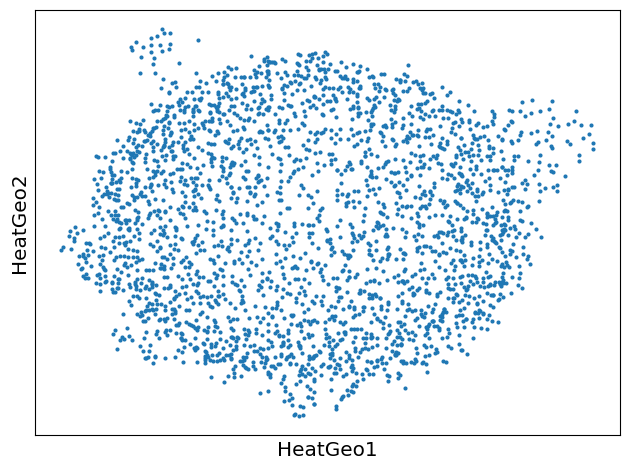

In [10]:
scprep.plot.scatter2d(emb, ticks=False, label_prefix="HeatGeo")

In [11]:
np.save("../data/myeloid_heatgeo.npy", emb)
np.save("../data/myeloid.npy", data.X)
np.save("../data/myeloid_phate.npy", data.obsm["X_phate"])
